In [1]:
import numpy as np
import matplotlib.pylab as plt
import enzoic_tools as enzoic

In [2]:
ch = enzoic.hierarchy(path='/Users/tabel/Research/CONTEXT/music-files/ic/')
ch.read_density()
ch.read_grid_velocities()
ch.read_displacements()
ch.read_particle_velocities()
ch.set_xyz()
ch.read_displacements()


In [3]:
import importlib
importlib.reload(enzoic)

<module 'enzoic_tools' from '/Users/tabel/Research/CONTEXT/ic_analysis/enzoic_tools.py'>

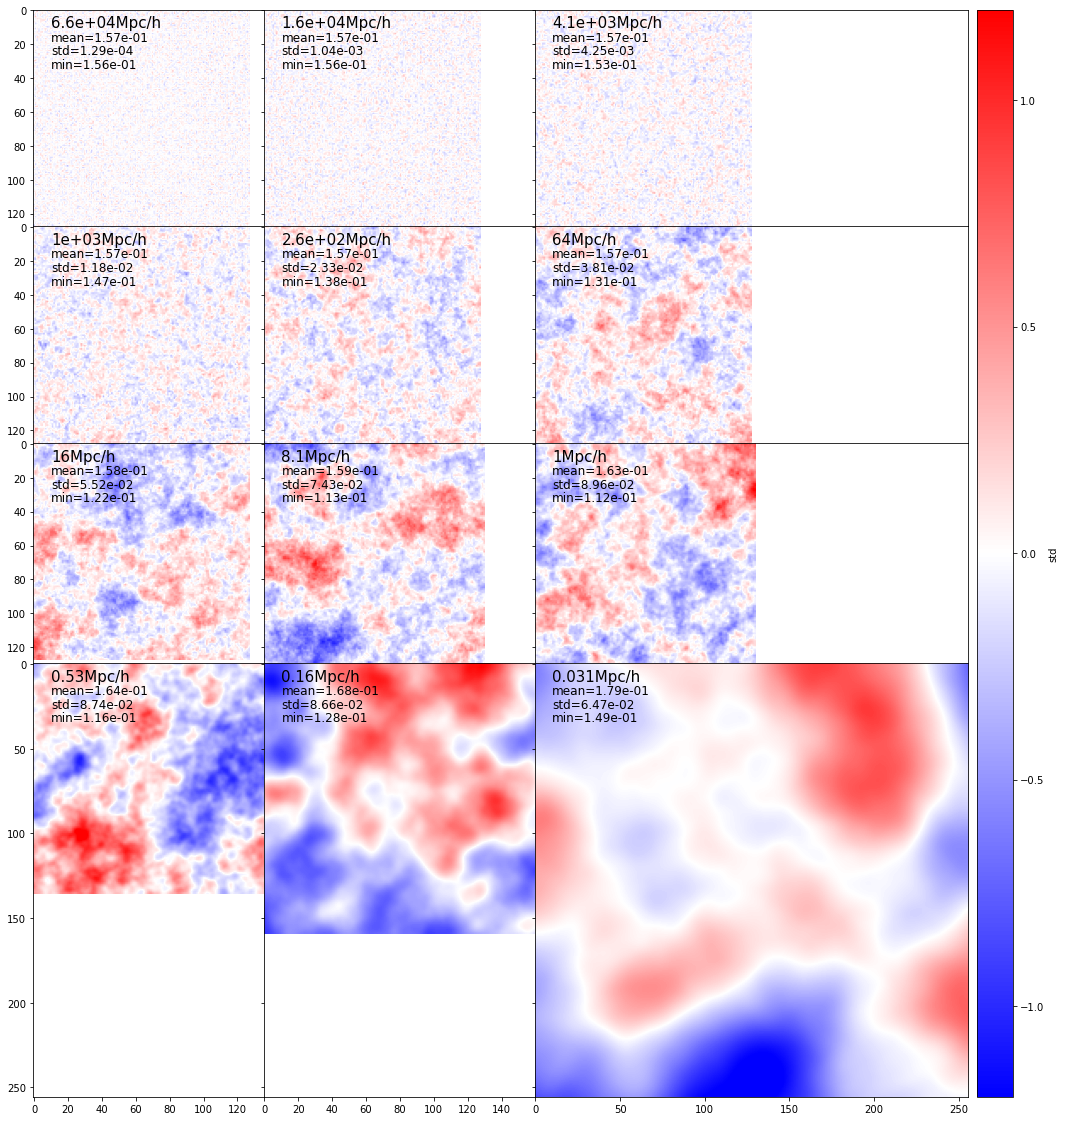

In [4]:
gd = [cg.density for cg in ch.grids]
gl = [g.BinaryLevel-7 for g in ch.grids]
rskip = 2
enzoic.plot_grids(range(1), gd[0::rskip], vmin=-1.2, vmax=1.2, levels=gl[0::rskip])

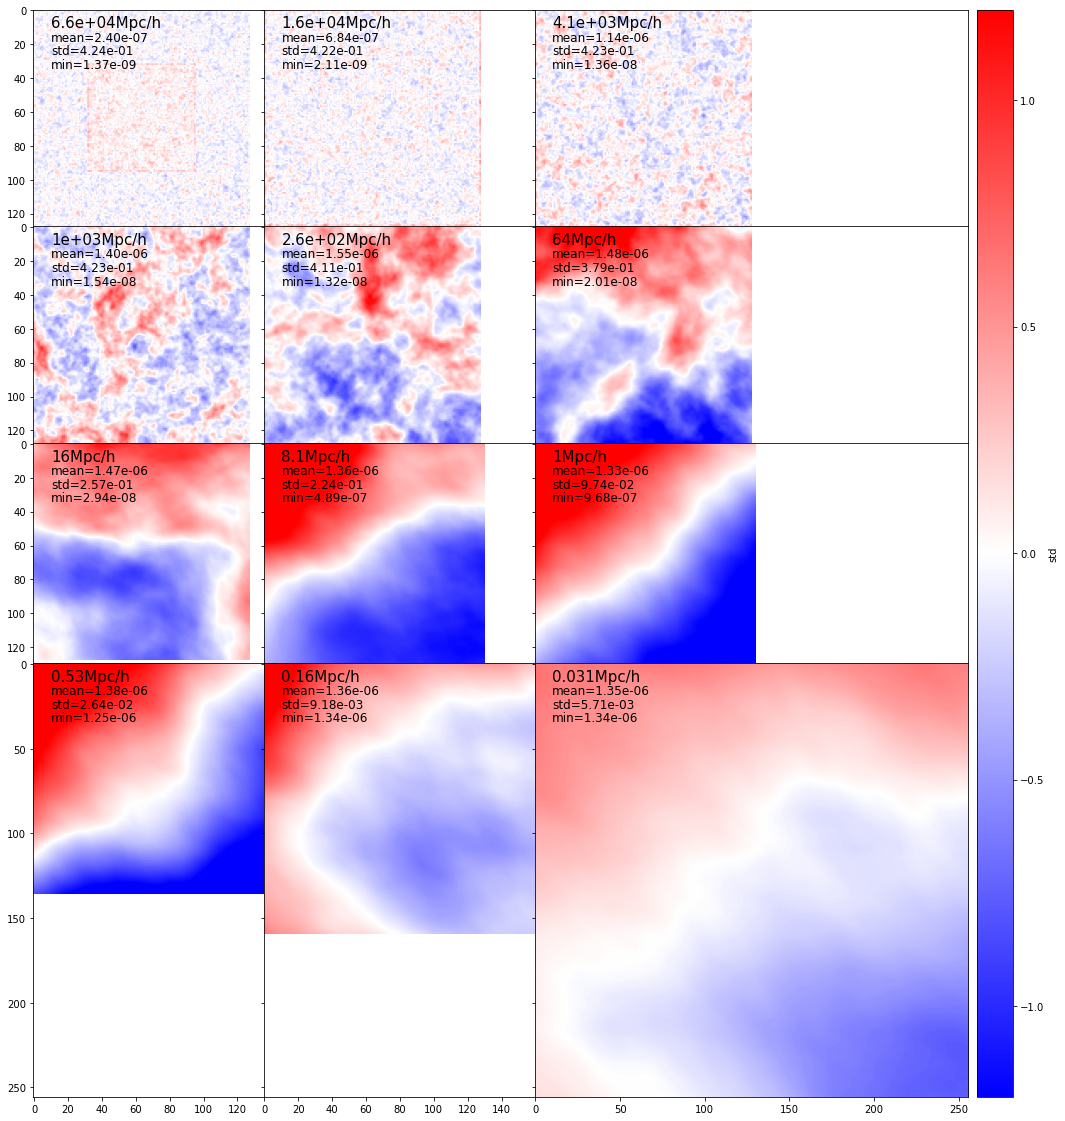

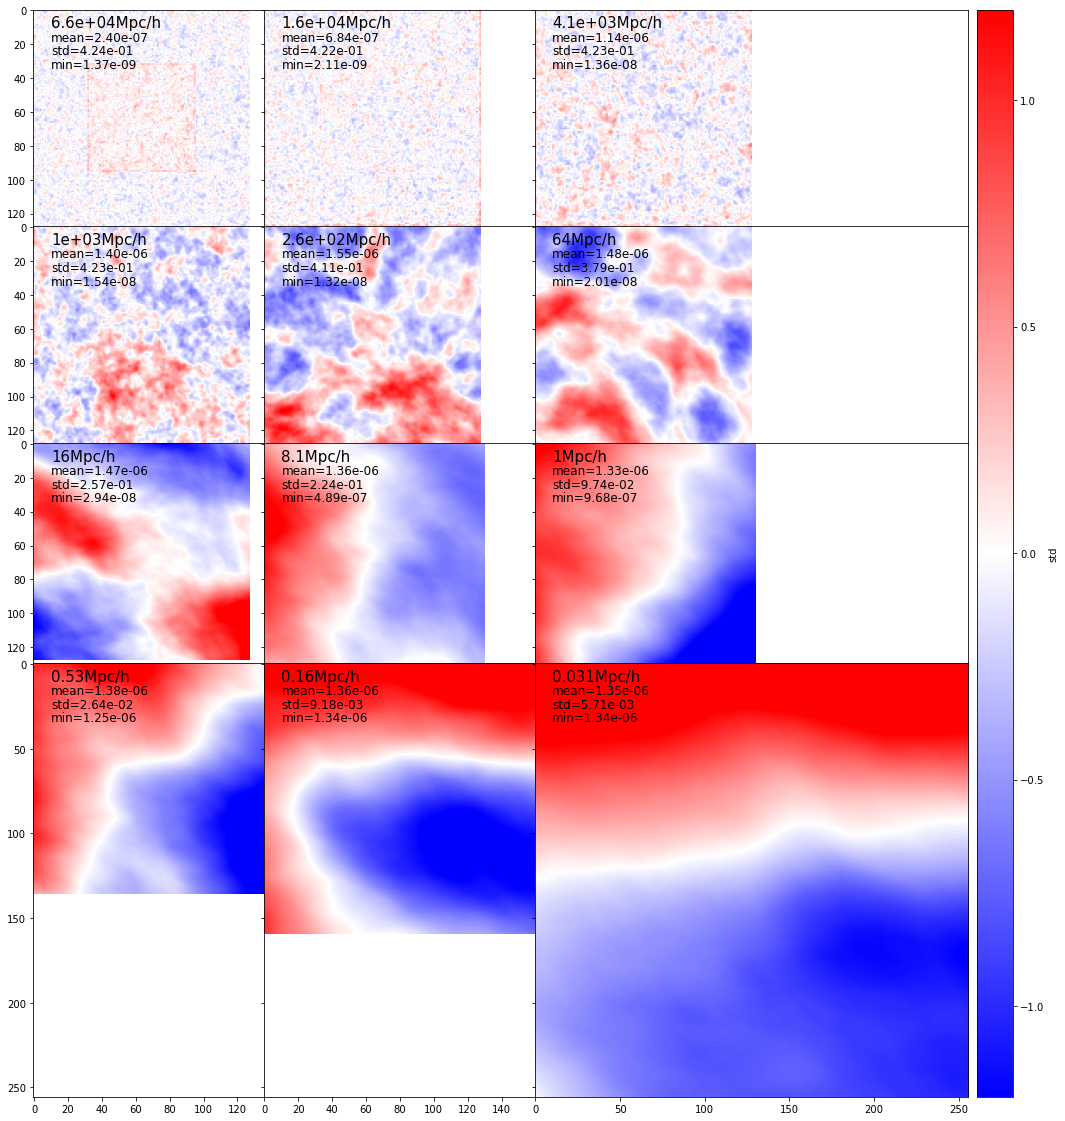

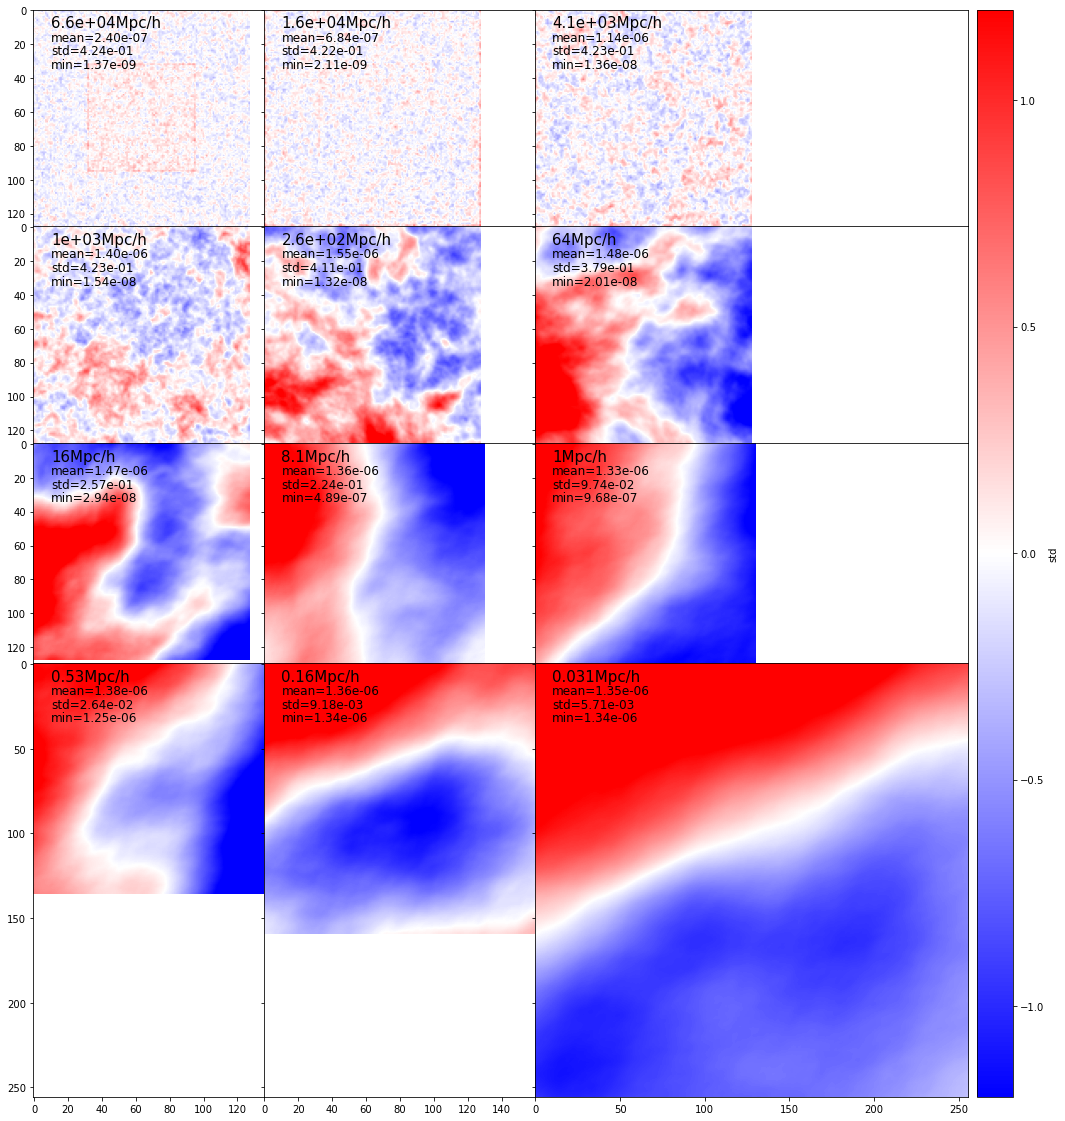

In [6]:
for cg in ch.grids:
#    print(cg.particle_velocities[0,:].mean())
#    print(cg.particle_velocities[1,:].mean())
#    print(cg.particle_velocities[2,:].mean())
    cg.vrms = np.sqrt((cg.particle_velocities**2).sum(axis=0))

gd = [cg.vrms for cg in ch.grids]

enzoic.plot_grids(range(3), gd[0::rskip], vmin=-1.2, vmax=1.2, levels=gl[0::rskip])

In [ ]:
ref_center = np.array([0.64424896240234375,0.230190277099609375,0.417903900146484375])
ref_delta = np.zeros(3)
cg = ch.grids[-1]
ind = cg.vrms.argmin()
for i in range(3):
    ref_delta[i] = cg.xyz[i,:].flatten()[ind]-(cg.RightEdge+cg.LeftEdge)[i]/2
    print(ref_delta[i]/cg.dx[i], cg.particle_velocities[i,:].mean(), cg.vrms.flatten()[ind])


newr =  ref_center - ref_delta
print("ref_center = {r0:.19g},{r1:.19g},{r2:.19g}".format(r0=newr[0],r1=newr[1],r2=newr[2]))
print("ref_center = np.array([{r0:.19g},{r1:.19g},{r2:.19g}])".format(r0=newr[0],r1=newr[1],r2=newr[2]))

117.4999999994359996 -6.593925060862515e-08 1.8088946174086137e-07
-117.499999999429320496 9.795610203651701e-08 1.8088946174086137e-07
79.50000000185846716 1.3931373198591605e-07 1.8088946174086137e-07
ref_center = 0.6442487435415387154,0.2301904959604144096,0.4179037520661950111
ref_center = np.array([0.6442487435415387154,0.2301904959604144096,0.4179037520661950111])


In [ ]:
(cg.LeftEdge,cg.RightEdge)

(array([0.5037744 , 0.49569869, 0.49579024], dtype=float128),
 array([0.50377488, 0.49569917, 0.49579072], dtype=float128))

In [ ]:
a = 1e-110

In [ ]:
2.**11

2048.0